# Explainable k-means clustering
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import mplcursors

def load_dataset(file_path):
    """
    Lees de dataset in vanuit het opgegeven bestandspad en retourneer deze als pandas dataframe.
    """
    return pd.read_csv(file_path, low_memory=False)

def select_columns(df, columns):
    """
    Selecteer de opgegeven kolommen uit het gegeven pandas dataframe.
    """
    return df[columns].values

def kmeans_clustering(X, n_clusters):
    """
    Voer k-means clustering uit op de gegeven dataset en retourneer de labels en centra van de clusters.
    """
    kmeans = cluster.KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    return kmeans.labels_, kmeans.cluster_centers_

def plot_clusters(X, labels, centroids):
    """
    Plot de datapunten en de clustercentra in de dataset.
    """
    colors = ['r', 'g', 'b', 'y']
    scatter  = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')

     # Make the datapoints hoverable
    cursor = mplcursors.cursor(scatter, hover=True)
    cursor.connect('add', handle_hover)
    
def plot_cluster_boundaries(X, kmeans):
    """
    Teken de afbakening tussen de clusters in de dataset.
    """
    h = 0.1  # stapgrootte van het mesh-grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='black', linewidths=1)

def handle_hover(sel):
    """
    Handle hover events on the datapoints in the plot.
    """
    ind = sel.target.index
    x, y = sel.target[0], sel.target[1]
    plt.annotate(f"({x:.2f}, {y:.2f})", xy=(x, y), xytext=(-20, 20), textcoords='offset points', 
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))



## Execution

C:\Users\michi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


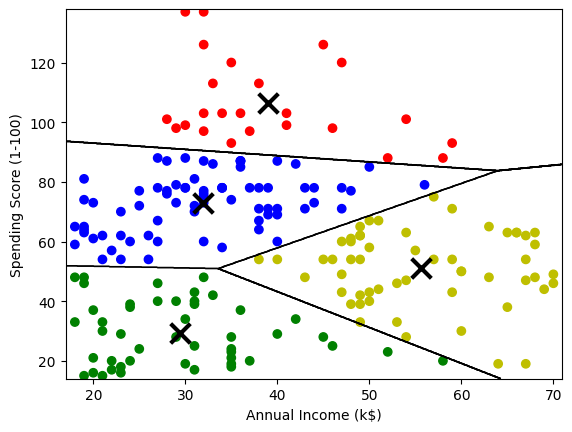

In [88]:
df = load_dataset("./datasets/Mall_Customers.csv")

# kolommen selecteren
X = select_columns(df, ['Age','Annual Income (k$)'])

# k-means clustering uitvoeren
labels, centroids = kmeans_clustering(X, n_clusters=4)

# de clusters plotten
plot_clusters(X, labels, centroids)

# de afbakening tussen de clusters plotten
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
plot_cluster_boundaries(X, kmeans)

plt.show()